In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import random_split
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
dataset = MNIST(root = 'data/', download = True)

In [3]:
len(dataset)

60000

In [4]:
test_dataset = MNIST(root = 'data/', train = False)
len(test_dataset)

10000

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

label: 5


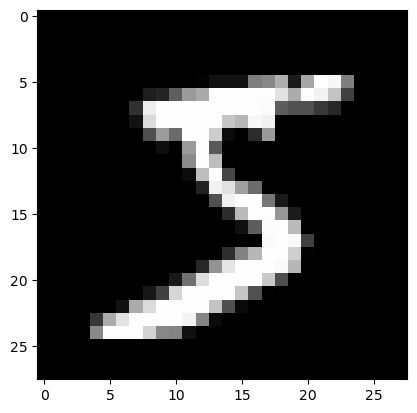

In [6]:
image, label = dataset[0]
plt.imshow(image, cmap = 'gray')
print(f"label: {label}")

label: 3


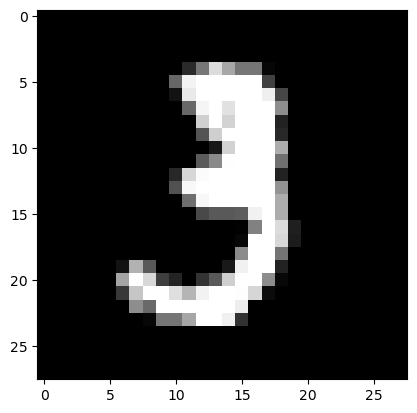

In [7]:
image, label = dataset[10]
plt.imshow(image, cmap = 'gray')
print(f"label: {label}")

In [8]:
dataset = MNIST(root = 'data/', train = True, transform = transforms.ToTensor())

In [9]:
img_tensor, label = dataset[0]
print(f"The shape of the image tensor is {img_tensor.shape} and the label is {label}")

The shape of the image tensor is torch.Size([1, 28, 28]) and the label is 5


In [10]:
print(img_tensor)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

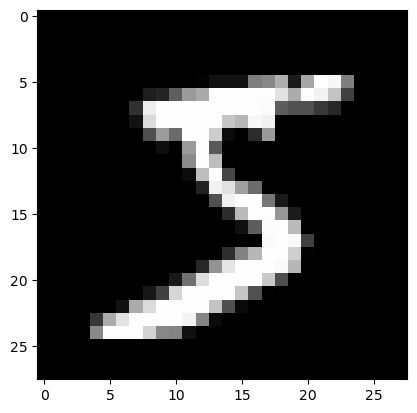

In [11]:
plt.imshow(img_tensor[0,:,:], cmap = 'gray')

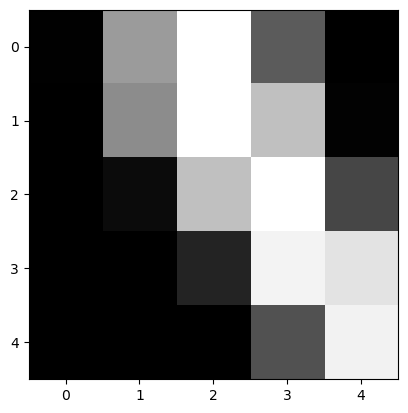

In [12]:
plt.imshow(img_tensor[0,10:15,10:15], cmap = 'gray')

In [13]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor),torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


In [14]:
train_ds, valid_ds = random_split(dataset, [50000,10000])
len(train_ds), len(valid_ds)

(50000, 10000)

In [15]:
batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle = True)
val_loader = DataLoader(valid_ds, batch_size)

In [16]:
input_size = 28*28
num_of_classes = 10

# Logistic Regression Model
model = nn.Linear(input_size,num_of_classes)

In [17]:
print(model.weight.shape)
print(model.weight)

torch.Size([10, 784])
Parameter containing:
tensor([[-0.0175,  0.0288,  0.0017,  ..., -0.0028, -0.0201,  0.0281],
        [ 0.0310, -0.0330,  0.0119,  ..., -0.0147,  0.0346, -0.0234],
        [-0.0039,  0.0104,  0.0269,  ...,  0.0338,  0.0086, -0.0160],
        ...,
        [-0.0024,  0.0334, -0.0122,  ...,  0.0164, -0.0299,  0.0271],
        [-0.0007,  0.0313, -0.0301,  ...,  0.0029, -0.0295, -0.0102],
        [ 0.0105,  0.0214, -0.0077,  ...,  0.0169,  0.0320, -0.0281]],
       requires_grad=True)


In [18]:
print(model.bias.shape)
print(model.bias)

torch.Size([10])
Parameter containing:
tensor([-0.0027,  0.0143, -0.0148,  0.0265, -0.0109,  0.0156, -0.0307, -0.0352,
         0.0300,  0.0017], requires_grad=True)


In [19]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

tensor([4, 4, 9, 2, 1, 8, 7, 8, 5, 2, 9, 1, 2, 3, 7, 3, 8, 1, 2, 7, 8, 8, 1, 9,
        9, 2, 7, 3, 7, 4, 2, 3, 7, 3, 1, 1, 1, 3, 5, 2, 9, 3, 6, 8, 9, 0, 7, 7,
        5, 3, 2, 5, 7, 1, 9, 2, 4, 1, 8, 8, 0, 7, 7, 6, 5, 2, 2, 0, 1, 7, 8, 1,
        1, 3, 4, 4, 8, 3, 2, 1, 6, 2, 3, 5, 4, 2, 7, 6, 6, 1, 7, 3, 2, 9, 8, 0,
        6, 4, 7, 3, 3, 7, 6, 8, 1, 7, 2, 6, 5, 1, 1, 2, 9, 3, 8, 1, 0, 0, 9, 4,
        5, 1, 7, 0, 3, 6, 4, 1])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

In [20]:
images.shape

torch.Size([128, 1, 28, 28])

In [21]:
images.reshape(128,784).shape

torch.Size([128, 784])

In [22]:
class Perceptron(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_of_classes)
    
    def forward(self, xb):
        xb  = xb.reshape(-1,784)
        out = self.linear(xb)
        return out

model = Perceptron()

In [23]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [24]:
print(model.linear.weight.shape, model.linear.bias.shape)
print(model.parameters())

torch.Size([10, 784]) torch.Size([10])
<generator object Module.parameters at 0x14411d8c0>


In [25]:
for images, labels in train_loader:
    print(images.shape)
    output = model(images)
    
    break

print(f"Output.shape: {output.shape}")
print(f"Sample Output: {output[:2].data}")

torch.Size([128, 1, 28, 28])
Output.shape: torch.Size([128, 10])
Sample Output: tensor([[-0.1752, -0.0011,  0.1684, -0.0379, -0.0558,  0.0310,  0.0017, -0.0572,
          0.1035,  0.1501],
        [ 0.0114,  0.0074, -0.1236, -0.2529, -0.3558,  0.3935,  0.1021, -0.2118,
          0.1627,  0.1452]])


In [26]:
probs = F.softmax(output, dim = 1)
print(f"Sample Probabilities: {probs[:2].data}")
print(f"Sum: {torch.sum(probs[0]).item()}")

Sample Probabilities: tensor([[0.0825, 0.0981, 0.1163, 0.0946, 0.0929, 0.1013, 0.0984, 0.0928, 0.1090,
         0.1142],
        [0.1000, 0.0996, 0.0874, 0.0768, 0.0693, 0.1466, 0.1095, 0.0800, 0.1164,
         0.1143]])
Sum: 0.9999998807907104


In [27]:
max_probs, preds = torch.max(probs, dim = 1)
print(f"preds: {preds}")
print(f"max_probs: {max_probs}")

preds: tensor([2, 5, 9, 9, 9, 2, 9, 9, 8, 9, 2, 1, 6, 6, 9, 9, 9, 9, 9, 9, 5, 6, 9, 9,
        9, 8, 8, 2, 9, 9, 9, 9, 8, 6, 5, 1, 9, 9, 9, 8, 8, 5, 1, 9, 9, 9, 8, 9,
        2, 2, 5, 9, 9, 5, 6, 5, 9, 9, 1, 9, 9, 8, 9, 9, 9, 9, 2, 2, 2, 5, 8, 2,
        5, 6, 8, 9, 9, 1, 2, 5, 9, 5, 6, 5, 5, 9, 1, 8, 9, 5, 5, 2, 5, 1, 5, 9,
        5, 3, 5, 2, 9, 6, 5, 2, 6, 9, 9, 9, 6, 9, 9, 5, 5, 2, 8, 9, 5, 9, 8, 9,
        9, 9, 5, 1, 9, 5, 9, 9])
max_probs: tensor([0.1163, 0.1466, 0.1466, 0.1437, 0.1202, 0.1451, 0.1263, 0.1457, 0.1131,
        0.1261, 0.1541, 0.1107, 0.1280, 0.1203, 0.1235, 0.1286, 0.1396, 0.1375,
        0.1422, 0.1434, 0.1397, 0.1345, 0.1412, 0.1271, 0.1596, 0.1524, 0.1335,
        0.1345, 0.1575, 0.1280, 0.1624, 0.1282, 0.1277, 0.1289, 0.1489, 0.1352,
        0.1414, 0.1382, 0.1467, 0.1385, 0.1257, 0.1327, 0.1195, 0.1370, 0.1709,
        0.1638, 0.1281, 0.1444, 0.1157, 0.1755, 0.1563, 0.1325, 0.1173, 0.1350,
        0.1168, 0.1324, 0.1204, 0.1305, 0.1267, 0.1260, 0.1278, 0.135

In [28]:
print(f"labels: {labels}")

labels: tensor([5, 6, 8, 6, 7, 5, 0, 8, 2, 4, 3, 6, 2, 7, 2, 2, 7, 2, 9, 4, 3, 0, 0, 4,
        8, 5, 4, 5, 0, 7, 0, 2, 7, 9, 8, 8, 7, 9, 2, 9, 3, 2, 2, 6, 8, 0, 5, 8,
        4, 7, 6, 8, 5, 2, 4, 1, 9, 5, 2, 9, 7, 6, 0, 0, 9, 6, 0, 5, 7, 2, 7, 3,
        1, 2, 3, 4, 8, 1, 8, 8, 0, 8, 5, 1, 6, 9, 4, 8, 5, 6, 3, 3, 2, 1, 5, 0,
        2, 1, 8, 4, 1, 4, 2, 2, 4, 6, 2, 4, 7, 4, 3, 6, 2, 3, 9, 8, 2, 7, 3, 9,
        3, 4, 1, 1, 0, 0, 0, 2])


In [29]:
torch.sum(preds == labels)

tensor(13)

In [30]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim = 1)
    return torch.tensor(torch.sum(preds == labels).item()/len(preds))

In [31]:
accuracy(output, labels)

tensor(0.1016)

In [32]:
probs

tensor([[0.0825, 0.0981, 0.1163,  ..., 0.0928, 0.1090, 0.1142],
        [0.1000, 0.0996, 0.0874,  ..., 0.0800, 0.1164, 0.1143],
        [0.0790, 0.0920, 0.0992,  ..., 0.1053, 0.1145, 0.1466],
        ...,
        [0.0847, 0.0916, 0.1100,  ..., 0.0916, 0.1091, 0.1315],
        [0.0792, 0.0877, 0.1177,  ..., 0.0917, 0.1311, 0.1461],
        [0.0881, 0.0985, 0.1041,  ..., 0.0876, 0.1281, 0.1440]],
       grad_fn=<SoftmaxBackward0>)

In [33]:
output

tensor([[-0.1752, -0.0011,  0.1684,  ..., -0.0572,  0.1035,  0.1501],
        [ 0.0114,  0.0074, -0.1236,  ..., -0.2118,  0.1627,  0.1452],
        [-0.1453,  0.0069,  0.0824,  ...,  0.1421,  0.2266,  0.4735],
        ...,
        [-0.1434, -0.0657,  0.1173,  ..., -0.0652,  0.1089,  0.2957],
        [-0.1695, -0.0672,  0.2269,  ..., -0.0233,  0.3342,  0.4425],
        [-0.0628,  0.0490,  0.1037,  ..., -0.0688,  0.3115,  0.4282]],
       grad_fn=<AddmmBackward0>)

In [34]:
loss_fn = F.cross_entropy

In [35]:
loss = loss_fn(output,labels)
print(loss)

tensor(2.3383, grad_fn=<NllLossBackward0>)


In [36]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.SGD):
    optimizer = opt_func(model.parameters(),lr)
    history = []
    
    for epoch in range(1,epoch+1):
        
        for batch in train_loader:
            loss = model.traing_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(resutl)
    
    return history

In [37]:
l1 = [1, 2, 3, 4, 5]

In [38]:
l2 = [x*2 for x in l1]
l2

[2, 4, 6, 8, 10]

In [39]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [48]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_of_classes)
    
    def forward(self, xb):
        xb = xb.reshape(-1,784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels in batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = list([x['val_loss'] for x in outputs])
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = list([x['val_acc'] for x in outputs])
        epoch_acc = torch.stack(batch_accs).mean()
        return [f"val_loss: {epoch_loss.item()}, val_acc: {epoch_acc.item()}"]
    
    def epoch_end(self, epoch, result):
        print(f"Epoch [{epoch}], val_loss: {result['val_loss']}, val_acc: {result['val_acc']}")

model = MnistModel()

In [49]:
result0 = evaluate(model, val_loader)
result0

['val_loss: 2.2771241664886475, val_acc: 0.12935127317905426']